In [80]:
import pandas as pd
import numpy as np
import pandas_market_calendars as mcal
import matplotlib.pyplot as plt

# for Robust location estimation
from statsmodels import robust
import statsmodels.api as sm
from astropy.stats import biweight_location

import yfinance as yf

#### Load closing price, index composition and capitalization of all SX5E stocks

In [54]:
close_price = pd.read_csv("data/SX5E/close_mat.csv")
index_composition = pd.read_csv("data/SX5E/SX5E Index_compositionMat.csv")
capitalization = pd.read_csv("data/SX5E/capitalization_mat.csv")

In [55]:
display(close_price.head())

,Unnamed: 0,URW NA Equity,LINU GY Equity,LIN GY Equity,UN01 GY Equity,OSR GY Equity,AMS SQ Equity,VOW3 GY Equity,APAM NA Equity,UL NA Equity,...,INGA NA Equity,ENI IM Equity,RDA NA Equity,AVE FP Equity,EOAN GY Equity,DBK GY Equity,ALU FP Equity,ABI BB Equity,DTE GY Equity,ACA FP Equity
0,20191013,132.500000,NaN,177.550003,27.500000,38.430000,66.820000,138.955765,22.510000,NaN,...,9.838,13.836,NaN,NaN,8.84,6.797,NaN,83.940002,15.456,11.220
1,20191012,132.500000,NaN,177.550003,27.500000,38.430000,66.820000,138.955765,22.510000,NaN,...,9.838,13.836,NaN,NaN,8.84,6.797,NaN,83.940002,15.456,11.220
2,20191011,132.500000,NaN,177.550003,27.500000,38.430000,66.820000,138.955765,22.510000,NaN,...,9.838,13.836,NaN,NaN,8.84,6.797,NaN,83.940002,15.456,11.220
3,20191010,130.600006,NaN,174.449997,27.120001,38.770000,65.839996,132.451080,21.299999,NaN,...,9.467,13.682,NaN,NaN,8.68,6.464,NaN,83.589996,15.304,10.735
4,20191009,130.949997,NaN,169.350006,27.139999,39.049999,64.760002,129.061081,20.600000,NaN,...,9.064,13.600,NaN,NaN,8.82,6.294,NaN,84.290001,15.350,10.490


In [56]:
display(index_composition.head())

,Unnamed: 0,URW NA Equity,LINU GY Equity,LIN GY Equity,UN01 GY Equity,OSR GY Equity,AMS SQ Equity,VOW3 GY Equity,APAM NA Equity,UL NA Equity,...,INGA NA Equity,ENI IM Equity,RDA NA Equity,AVE FP Equity,EOAN GY Equity,DBK GY Equity,ALU FP Equity,ABI BB Equity,DTE GY Equity,ACA FP Equity
0,20191013,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,20191012,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,20191011,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,20191010,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,20191009,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [57]:
display(capitalization.head())

,Unnamed: 0,URW NA Equity,LINU GY Equity,LIN GY Equity,UN01 GY Equity,OSR GY Equity,AMS SQ Equity,VOW3 GY Equity,APAM NA Equity,UL NA Equity,...,INGA NA Equity,ENI IM Equity,RDA NA Equity,AVE FP Equity,EOAN GY Equity,DBK GY Equity,ALU FP Equity,ABI BB Equity,DTE GY Equity,ACA FP Equity
0,20191013,18334.214844,NaN,105009.804688,10030.963867,3713.159912,28817.357422,80811.640625,1884.000000,NaN,...,38334.421875,50282.589844,NaN,NaN,23349.259766,14047.857422,NaN,169495.171875,73593.101562,32366.208984
1,20191012,18334.214844,NaN,105009.804688,10030.963867,3713.159912,28817.357422,80811.640625,1884.000000,NaN,...,38334.421875,50282.589844,NaN,NaN,23349.259766,14047.857422,NaN,169495.171875,73593.101562,32366.208984
2,20191011,18334.214844,NaN,105009.804688,10030.963867,3713.159912,28817.357422,80811.640625,1884.000000,NaN,...,38334.421875,50282.589844,NaN,NaN,23349.259766,14047.857422,NaN,169495.171875,73593.101562,32366.208984
3,20191010,18071.308594,NaN,103377.218750,9902.877930,3746.080078,28394.712891,77128.078125,1782.729980,NaN,...,36888.792969,49722.925781,NaN,NaN,22926.648438,13359.621094,NaN,168788.421875,72869.359375,30967.132812
4,20191009,18119.738281,NaN,101301.351562,9939.473633,3760.209961,27928.945312,75223.796875,1724.140015,NaN,...,35318.476562,49424.921875,NaN,NaN,23296.431641,13008.270508,NaN,170201.906250,73088.390625,30260.384766


Now convert date column into datetime and add a column with the corresponding weekdays

In [58]:
def setup_tables(df: pd.DataFrame):
    X = df.copy()
    col_name = X.columns[0]
    X.rename(columns={col_name: "Date"}, inplace=True)
    X["Date"] = pd.to_datetime(X["Date"], format="%Y%m%d")
    
    def _function(x):
        return x.day_name()
    
    days = X["Date"].apply(_function)
    
    X.insert(1, column="Day_of_week", value=days)
    X.sort_values(by=["Date"], inplace=True)
    X.reset_index(drop=True, inplace=True)
    return X

In [59]:
close_price = setup_tables(close_price)
index_composition = setup_tables(index_composition)
capitalization = setup_tables(capitalization)

In [60]:
# To verify
display(close_price.head())
print(close_price.dtypes)

,Date,Day_of_week,URW NA Equity,LINU GY Equity,LIN GY Equity,UN01 GY Equity,OSR GY Equity,AMS SQ Equity,VOW3 GY Equity,APAM NA Equity,...,INGA NA Equity,ENI IM Equity,RDA NA Equity,AVE FP Equity,EOAN GY Equity,DBK GY Equity,ALU FP Equity,ABI BB Equity,DTE GY Equity,ACA FP Equity
0,2002-01-02,Wednesday,NaN,NaN,22.700001,NaN,NaN,NaN,29.078930,NaN,...,21.385405,13.68,54.400002,77.599998,15.954892,62.140289,17.982100,18.748993,19.200001,15.947296
1,2002-01-03,Thursday,NaN,NaN,23.400000,NaN,NaN,NaN,29.797352,NaN,...,21.746307,14.07,54.900002,77.599998,15.988493,62.450993,19.614300,18.442657,19.820000,15.974324
2,2002-01-04,Friday,NaN,NaN,23.549999,NaN,NaN,NaN,29.934193,NaN,...,21.515945,13.93,54.799999,76.250000,15.918491,64.004501,19.728201,18.317621,20.490000,15.938286
3,2002-01-05,Saturday,NaN,NaN,23.549999,NaN,NaN,NaN,29.934193,NaN,...,21.515945,13.93,54.799999,76.250000,15.918491,64.004501,19.728201,18.317621,20.490000,15.938286
4,2002-01-06,Sunday,NaN,NaN,23.549999,NaN,NaN,NaN,29.934193,NaN,...,21.515945,13.93,54.799999,76.250000,15.918491,64.004501,19.728201,18.317621,20.490000,15.938286


Date              datetime64[ns]
Day_of_week               object
URW NA Equity            float64
LINU GY Equity           float64
LIN GY Equity            float64
                       ...      
DBK GY Equity            float64
ALU FP Equity            float64
ABI BB Equity            float64
DTE GY Equity            float64
ACA FP Equity            float64
Length: 92, dtype: object


In [61]:
def select_time_slice(df: pd.DataFrame, start: int = 20020102, end: int = 20191013) -> pd.DataFrame:
    X = df.copy()
    start = pd.to_datetime(start, format="%Y%m%d")
    end = pd.to_datetime(end, format="%Y%m%d")
    X = X[X["Date"] <= end]
    X = X[X["Date"] >= start]
    return X

In [62]:
# Example from 2014-01-01 to 2018-12-31
X_close = select_time_slice(close_price, 20140101, 20181231)
X_index_comp = select_time_slice(index_composition, 20140101, 20181231)
X_capitalization = select_time_slice(capitalization, 20140101, 20181231)
#display(X_close.head())
#display(X_index_comp.head())
#display(X_capitalization.head())

Now let's sum over rows to find the columns (the stocks) that are part of the SX5E index for all the considered period. 

In [63]:
sum_index_series = X_index_comp.iloc[:, 2:].sum(axis=0)
print(sum_index_series)

URW NA Equity      210.0
LINU GY Equity      35.0
LIN GY Equity       64.0
UN01 GY Equity       1.0
OSR GY Equity        0.0
                   ...  
DBK GY Equity     1727.0
ALU FP Equity        0.0
ABI BB Equity     1826.0
DTE GY Equity     1826.0
ACA FP Equity        0.0
Length: 90, dtype: float64


In [64]:
max(sum_index_series)

1826.0

This means that the total number of days is 1826, we want to select only the stocks (the columns) whose sum over the rows for the considered period is equal to 1826.

In [65]:
full_time_stock = []

for stock in sum_index_series.index:
    if sum_index_series[stock] == 1826:
        full_time_stock.append(stock)

In [66]:
len(full_time_stock)

40

In [67]:
X_close = X_close[["Date", "Day_of_week"] + full_time_stock]
X_index_comp = X_index_comp[["Date", "Day_of_week"] + full_time_stock]
X_capitalization = X_capitalization[["Date", "Day_of_week"] + full_time_stock]

In [68]:
display(X_close)

,Date,Day_of_week,VOW3 GY Equity,ENGI FP Equity,BAYN GY Equity,BNP FP Equity,PHIA NA Equity,ISP IM Equity,SAN FP Equity,MC FP Equity,...,GLE FP Equity,ITX SQ Equity,OR FP Equity,BBVA SQ Equity,ASML NA Equity,SAP GY Equity,INGA NA Equity,ENI IM Equity,ABI BB Equity,DTE GY Equity
4382,2014-01-01,Wednesday,175.652130,17.094999,100.328484,56.650002,24.998766,1.7940,76.700958,119.502663,...,42.220001,23.960001,127.699997,8.9480,68.040001,62.310001,10.100,17.490,77.260002,12.43
4383,2014-01-02,Thursday,172.511642,16.715000,98.458710,55.540001,25.125425,1.7830,74.811279,118.286003,...,41.520000,23.719999,125.599998,8.7530,67.760002,61.669998,10.080,17.320,75.610001,12.13
4384,2014-01-03,Friday,172.511642,16.745001,99.196777,55.680000,25.242702,1.8090,75.845627,118.060699,...,41.325001,23.780001,126.550003,8.7250,67.750000,61.709999,10.085,17.480,76.459999,12.27
4385,2014-01-04,Saturday,172.511642,16.745001,99.196777,55.680000,25.242702,1.8090,75.845627,118.060699,...,41.325001,23.780001,126.550003,8.7250,67.750000,61.709999,10.085,17.480,76.459999,12.27
4386,2014-01-05,Sunday,172.511642,16.745001,99.196777,55.680000,25.242702,1.8090,75.845627,118.060699,...,41.325001,23.780001,126.550003,8.7250,67.750000,61.709999,10.085,17.480,76.459999,12.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6203,2018-12-27,Thursday,118.254364,12.020000,59.160000,38.544998,28.432636,1.9090,73.359215,247.149994,...,27.215000,22.190001,195.600006,4.5450,132.619995,85.790001,9.191,13.520,57.349998,14.59
6204,2018-12-28,Friday,119.527763,12.275000,60.560001,39.375000,28.798540,1.9398,74.811279,252.750000,...,27.795000,22.389999,198.100006,4.6410,136.619995,86.930000,9.358,13.748,57.500000,14.82
6205,2018-12-29,Saturday,119.527763,12.275000,60.560001,39.375000,28.798540,1.9398,74.811279,252.750000,...,27.795000,22.389999,198.100006,4.6410,136.619995,86.930000,9.358,13.748,57.500000,14.82
6206,2018-12-30,Sunday,119.527763,12.275000,60.560001,39.375000,28.798540,1.9398,74.811279,252.750000,...,27.795000,22.389999,198.100006,4.6410,136.619995,86.930000,9.358,13.748,57.500000,14.82


Now we extract the calendar for ONLY the trading days for the considered period.

In [69]:
start_period = '2014-01-01'
end_period = '2018-12-31'

EU500 = mcal.get_calendar('EUREX')

calendar = EU500.schedule(start_date=start_period, end_date=end_period)

#And finally convert the schedule into a daterange that will be the dateindex of our forecasted series.
dates = mcal.date_range(calendar, frequency='1D') 

In [70]:
print(dates)

DatetimeIndex(['2014-01-02 16:30:00+00:00', '2014-01-03 16:30:00+00:00',
               '2014-01-06 16:30:00+00:00', '2014-01-07 16:30:00+00:00',
               '2014-01-08 16:30:00+00:00', '2014-01-09 16:30:00+00:00',
               '2014-01-10 16:30:00+00:00', '2014-01-13 16:30:00+00:00',
               '2014-01-14 16:30:00+00:00', '2014-01-15 16:30:00+00:00',
               ...
               '2018-12-14 16:30:00+00:00', '2018-12-17 16:30:00+00:00',
               '2018-12-18 16:30:00+00:00', '2018-12-19 16:30:00+00:00',
               '2018-12-20 16:30:00+00:00', '2018-12-21 16:30:00+00:00',
               '2018-12-24 11:30:00+00:00', '2018-12-27 16:30:00+00:00',
               '2018-12-28 16:30:00+00:00', '2018-12-31 11:30:00+00:00'],
              dtype='datetime64[ns, UTC]', length=1272, freq=None)


In [71]:
# consider only year month day
dates = dates.strftime('%Y-%m-%d')

In [72]:
print(dates)

Index(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07', '2014-01-08',
       '2014-01-09', '2014-01-10', '2014-01-13', '2014-01-14', '2014-01-15',
       ...
       '2018-12-14', '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
       '2018-12-21', '2018-12-24', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', length=1272)


In [73]:
# set date column as index

X_close.set_index('Date', drop=True, inplace=True)
display(X_close.head())

,Day_of_week,VOW3 GY Equity,ENGI FP Equity,BAYN GY Equity,BNP FP Equity,PHIA NA Equity,ISP IM Equity,SAN FP Equity,MC FP Equity,ENEL IM Equity,...,GLE FP Equity,ITX SQ Equity,OR FP Equity,BBVA SQ Equity,ASML NA Equity,SAP GY Equity,INGA NA Equity,ENI IM Equity,ABI BB Equity,DTE GY Equity
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,Wednesday,175.652130,17.094999,100.328484,56.650002,24.998766,1.794,76.700958,119.502663,3.174,...,42.220001,23.960001,127.699997,8.948,68.040001,62.310001,10.100,17.49,77.260002,12.43
2014-01-02,Thursday,172.511642,16.715000,98.458710,55.540001,25.125425,1.783,74.811279,118.286003,3.134,...,41.520000,23.719999,125.599998,8.753,67.760002,61.669998,10.080,17.32,75.610001,12.13
2014-01-03,Friday,172.511642,16.745001,99.196777,55.680000,25.242702,1.809,75.845627,118.060699,3.178,...,41.325001,23.780001,126.550003,8.725,67.750000,61.709999,10.085,17.48,76.459999,12.27
2014-01-04,Saturday,172.511642,16.745001,99.196777,55.680000,25.242702,1.809,75.845627,118.060699,3.178,...,41.325001,23.780001,126.550003,8.725,67.750000,61.709999,10.085,17.48,76.459999,12.27
2014-01-05,Sunday,172.511642,16.745001,99.196777,55.680000,25.242702,1.809,75.845627,118.060699,3.178,...,41.325001,23.780001,126.550003,8.725,67.750000,61.709999,10.085,17.48,76.459999,12.27


Now subselect only the rows of the dataframe that falls in the training days.

In [74]:
X_close = X_close.loc[dates]

In [75]:
# check the presence of any Saturday or Sunday
print(X_close['ABI BB Equity'].isin(['Saturday', 'Sunday']).sum())

0


## Calculate log returns and subtract index return

In [78]:
returns = np.log(X_close.drop(['Day_of_week'], axis=1)/X_close.drop(['Day_of_week'], axis=1).shift(1))
returns

,VOW3 GY Equity,ENGI FP Equity,BAYN GY Equity,BNP FP Equity,PHIA NA Equity,ISP IM Equity,SAN FP Equity,MC FP Equity,ENEL IM Equity,CS FP Equity,...,GLE FP Equity,ITX SQ Equity,OR FP Equity,BBVA SQ Equity,ASML NA Equity,SAP GY Equity,INGA NA Equity,ENI IM Equity,ABI BB Equity,DTE GY Equity
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,0.000000,0.001793,0.007468,0.002518,0.004657,0.014477,0.013731,-0.001907,0.013942,0.003797,...,-0.004708,0.002526,0.007535,-0.003204,-0.000148,0.000648,0.000496,0.009195,0.011179,0.011476
2014-01-06,-0.008766,-0.012016,-0.004474,0.001615,0.007775,0.010448,0.001310,-0.018879,0.002514,-0.002023,...,0.009273,-0.005059,-0.009129,0.010603,-0.025412,0.004688,-0.010366,0.005705,-0.018080,-0.006541
2014-01-07,0.006270,0.012314,0.010409,0.028285,0.007898,0.032296,-0.001179,-0.007026,0.012477,0.025001,...,0.039488,0.009674,0.005567,0.055475,-0.008057,-0.007935,0.034853,0.004540,0.019910,0.004910
2014-01-08,0.000750,0.005952,-0.012903,0.014192,0.001828,0.021484,-0.012401,-0.014599,0.004947,0.006890,...,0.029297,-0.006720,-0.018812,0.006949,0.002743,0.016766,0.021064,-0.016558,0.004819,-0.002043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.004178,0.003604,0.006373,0.002535,-0.002109,-0.017008,-0.006191,0.013306,0.007354,0.005762,...,0.005712,0.003964,-0.004474,-0.007657,-0.013445,-0.015501,0.014114,-0.003768,-0.001509,-0.007632
2018-12-24,0.000000,-0.018556,0.000000,-0.018138,-0.013570,0.000000,-0.019211,-0.033296,0.000000,-0.001491,...,-0.017236,-0.022223,-0.015313,-0.013186,-0.015918,0.000000,-0.018183,0.000000,-0.018977,0.000000
2018-12-27,-0.041753,-0.021400,-0.037001,-0.006336,-0.002307,-0.001675,-0.006486,0.008125,-0.026971,-0.012223,...,-0.014410,-0.002700,-0.010426,-0.002856,0.013207,-0.007317,-0.013831,-0.018613,-0.019170,-0.028380
2018-12-28,0.010711,0.020993,0.023389,0.021305,0.012787,0.016005,0.019601,0.022405,-0.000793,0.012862,...,0.021088,0.008973,0.012700,0.020902,0.029715,0.013201,0.018007,0.016723,0.002612,0.015641


In [79]:
returns.dropna(inplace=True)

### Download index data

In [96]:
close_price.set_index(['Date'], drop=True, inplace=True)
capitalization.set_index(['Date'], drop=True, inplace=True)
index_composition.set_index(['Date'], drop=True, inplace=True)

In [99]:
weights = capitalization.drop(['Day_of_week'], axis=1) * index_composition.drop(['Day_of_week'], axis=1)
weights = weights / weights.sum()
weights = weights / weights.sum(axis=1).values.reshape((-1, 1))

In [103]:
weights.fillna(0, inplace=True)
weights

,URW NA Equity,LINU GY Equity,LIN GY Equity,UN01 GY Equity,OSR GY Equity,AMS SQ Equity,VOW3 GY Equity,APAM NA Equity,UL NA Equity,63DU GY Equity,...,INGA NA Equity,ENI IM Equity,RDA NA Equity,AVE FP Equity,EOAN GY Equity,DBK GY Equity,ALU FP Equity,ABI BB Equity,DTE GY Equity,ACA FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-02,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.010347,0.006504,0.049434,0.072621,0.009086,0.012288,0.035096,0.000000,0.011441,0.0
2002-01-03,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.010260,0.006523,0.048647,0.070814,0.008933,0.012079,0.037329,0.000000,0.011429,0.0
2002-01-04,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.010181,0.006477,0.048701,0.069786,0.008881,0.012416,0.037656,0.000000,0.011730,0.0
2002-01-05,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.010181,0.006477,0.048701,0.069786,0.008881,0.012416,0.037656,0.000000,0.011730,0.0
2002-01-06,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.010181,0.006477,0.048701,0.069786,0.008881,0.012416,0.037656,0.000000,0.011730,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-09,0.0,0.0,0.125498,0.0,0.0,0.102264,0.014352,0.0,0.0,0.0,...,0.005378,0.004743,0.000000,0.000000,0.000000,0.000000,0.000000,0.014689,0.008366,0.0
2019-10-10,0.0,0.0,0.126446,0.0,0.0,0.102651,0.014529,0.0,0.0,0.0,...,0.005546,0.004711,0.000000,0.000000,0.000000,0.000000,0.000000,0.014382,0.008235,0.0
2019-10-11,0.0,0.0,0.126226,0.0,0.0,0.102381,0.014960,0.0,0.0,0.0,...,0.005664,0.004682,0.000000,0.000000,0.000000,0.000000,0.000000,0.014193,0.008173,0.0


In [105]:
weights = weights.loc[dates]
weights

,URW NA Equity,LINU GY Equity,LIN GY Equity,UN01 GY Equity,OSR GY Equity,AMS SQ Equity,VOW3 GY Equity,APAM NA Equity,UL NA Equity,63DU GY Equity,...,INGA NA Equity,ENI IM Equity,RDA NA Equity,AVE FP Equity,EOAN GY Equity,DBK GY Equity,ALU FP Equity,ABI BB Equity,DTE GY Equity,ACA FP Equity
2014-01-02,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.041216,0.0,0.043313,0.0,...,0.013949,0.014293,0.0,0.0,0.010448,0.016600,0.0,0.024829,0.014625,0.0
2014-01-03,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.040915,0.0,0.043662,0.0,...,0.013897,0.014364,0.0,0.0,0.010471,0.016680,0.0,0.025001,0.014731,0.0
2014-01-06,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.040778,0.0,0.043755,0.0,...,0.013779,0.014473,0.0,0.0,0.010459,0.016767,0.0,0.024599,0.014662,0.0
2014-01-07,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.040585,0.0,0.043549,0.0,...,0.014105,0.014373,0.0,0.0,0.010399,0.017077,0.0,0.024808,0.014566,0.0
2014-01-08,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.040477,0.0,0.043178,0.0,...,0.014380,0.014112,0.0,0.0,0.010293,0.017387,0.0,0.024882,0.014510,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,0.090572,0.0,0.119248,0.0,0.0,0.109693,0.015713,0.0,0.000000,0.0,...,0.006416,0.005480,0.0,0.0,0.000000,0.000000,0.0,0.011845,0.009333,0.0
2018-12-24,0.089534,0.0,0.116895,0.0,0.0,0.110809,0.015921,0.0,0.000000,0.0,...,0.006384,0.005552,0.0,0.0,0.000000,0.000000,0.0,0.011776,0.009456,0.0
2018-12-27,0.088258,0.0,0.123637,0.0,0.0,0.112038,0.015140,0.0,0.000000,0.0,...,0.006307,0.005459,0.0,0.0,0.000000,0.000000,0.0,0.011572,0.009207,0.0
2018-12-28,0.087629,0.0,0.121886,0.0,0.0,0.112394,0.015188,0.0,0.000000,0.0,...,0.006334,0.005476,0.0,0.0,0.000000,0.000000,0.0,0.011445,0.009225,0.0


#### Calculate weighted returns

In [108]:
close_price.head()

,Day_of_week,URW NA Equity,LINU GY Equity,LIN GY Equity,UN01 GY Equity,OSR GY Equity,AMS SQ Equity,VOW3 GY Equity,APAM NA Equity,UL NA Equity,...,INGA NA Equity,ENI IM Equity,RDA NA Equity,AVE FP Equity,EOAN GY Equity,DBK GY Equity,ALU FP Equity,ABI BB Equity,DTE GY Equity,ACA FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-02,Wednesday,NaN,NaN,22.700001,NaN,NaN,NaN,29.078930,NaN,NaN,...,21.385405,13.68,54.400002,77.599998,15.954892,62.140289,17.982100,18.748993,19.200001,15.947296
2002-01-03,Thursday,NaN,NaN,23.400000,NaN,NaN,NaN,29.797352,NaN,NaN,...,21.746307,14.07,54.900002,77.599998,15.988493,62.450993,19.614300,18.442657,19.820000,15.974324
2002-01-04,Friday,NaN,NaN,23.549999,NaN,NaN,NaN,29.934193,NaN,NaN,...,21.515945,13.93,54.799999,76.250000,15.918491,64.004501,19.728201,18.317621,20.490000,15.938286
2002-01-05,Saturday,NaN,NaN,23.549999,NaN,NaN,NaN,29.934193,NaN,NaN,...,21.515945,13.93,54.799999,76.250000,15.918491,64.004501,19.728201,18.317621,20.490000,15.938286
2002-01-06,Sunday,NaN,NaN,23.549999,NaN,NaN,NaN,29.934193,NaN,NaN,...,21.515945,13.93,54.799999,76.250000,15.918491,64.004501,19.728201,18.317621,20.490000,15.938286


In [114]:
# Select only the period 2014-2019; fill nas with 0s and drop day of week column
# In this way we calculate returns for ALL THE STOCKS that have been part of the index

temp = close_price.loc[dates].fillna(0.000000001).drop(['Day_of_week'], axis=1)
close_price_returns = np.log(temp/temp.shift(1))
close_price_returns.head()

,URW NA Equity,LINU GY Equity,LIN GY Equity,UN01 GY Equity,OSR GY Equity,AMS SQ Equity,VOW3 GY Equity,APAM NA Equity,UL NA Equity,63DU GY Equity,...,INGA NA Equity,ENI IM Equity,RDA NA Equity,AVE FP Equity,EOAN GY Equity,DBK GY Equity,ALU FP Equity,ABI BB Equity,DTE GY Equity,ACA FP Equity
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,0.0,0.0,0.006623,0.0,0.008819,0.002789,0.000000,0.007477,0.012277,0.0,...,0.000496,0.009195,0.0,0.0,0.006490,0.009053,0.019158,0.011179,0.011476,-0.008256
2014-01-06,0.0,0.0,-0.006290,0.0,-0.001220,0.010755,-0.008766,-0.012367,0.000271,0.0,...,-0.010366,0.005705,0.0,0.0,-0.003049,0.003337,-0.004528,-0.018080,-0.006541,0.014295
2014-01-07,0.0,0.0,-0.014047,0.0,0.016349,-0.011738,0.006270,0.000377,0.006754,0.0,...,0.034853,0.004540,0.0,0.0,0.005709,0.029827,0.015611,0.019910,0.004910,0.058979
2014-01-08,0.0,0.0,0.005039,0.0,0.033894,0.007027,0.000750,-0.020180,-0.006754,0.0,...,0.021064,-0.016558,0.0,0.0,-0.008384,0.019770,0.012728,0.004819,-0.002043,0.011289


In [119]:
close_price_returns.dropna(inplace=True)
close_price_returns.head()

,URW NA Equity,LINU GY Equity,LIN GY Equity,UN01 GY Equity,OSR GY Equity,AMS SQ Equity,VOW3 GY Equity,APAM NA Equity,UL NA Equity,63DU GY Equity,...,INGA NA Equity,ENI IM Equity,RDA NA Equity,AVE FP Equity,EOAN GY Equity,DBK GY Equity,ALU FP Equity,ABI BB Equity,DTE GY Equity,ACA FP Equity
2014-01-03,0.0,0.0,0.006623,0.0,0.008819,0.002789,0.000000,0.007477,0.012277,0.0,...,0.000496,0.009195,0.0,0.0,0.006490,0.009053,0.019158,0.011179,0.011476,-0.008256
2014-01-06,0.0,0.0,-0.006290,0.0,-0.001220,0.010755,-0.008766,-0.012367,0.000271,0.0,...,-0.010366,0.005705,0.0,0.0,-0.003049,0.003337,-0.004528,-0.018080,-0.006541,0.014295
2014-01-07,0.0,0.0,-0.014047,0.0,0.016349,-0.011738,0.006270,0.000377,0.006754,0.0,...,0.034853,0.004540,0.0,0.0,0.005709,0.029827,0.015611,0.019910,0.004910,0.058979
2014-01-08,0.0,0.0,0.005039,0.0,0.033894,0.007027,0.000750,-0.020180,-0.006754,0.0,...,0.021064,-0.016558,0.0,0.0,-0.008384,0.019770,0.012728,0.004819,-0.002043,0.011289
2014-01-09,0.0,0.0,-0.014855,0.0,0.004518,0.008593,-0.003503,-0.010828,0.001354,0.0,...,-0.003797,-0.005774,0.0,0.0,-0.010387,-0.002899,-0.047277,0.002984,0.002043,-0.007041


In [121]:
# exclude first obs that was NA for returns (2014-01-02)
weights = weights.iloc[1:, :]
weights.head()

,URW NA Equity,LINU GY Equity,LIN GY Equity,UN01 GY Equity,OSR GY Equity,AMS SQ Equity,VOW3 GY Equity,APAM NA Equity,UL NA Equity,63DU GY Equity,...,INGA NA Equity,ENI IM Equity,RDA NA Equity,AVE FP Equity,EOAN GY Equity,DBK GY Equity,ALU FP Equity,ABI BB Equity,DTE GY Equity,ACA FP Equity
2014-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.040915,0.0,0.043662,0.0,...,0.013897,0.014364,0.0,0.0,0.010471,0.016680,0.0,0.025001,0.014731,0.0
2014-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.040778,0.0,0.043755,0.0,...,0.013779,0.014473,0.0,0.0,0.010459,0.016767,0.0,0.024599,0.014662,0.0
2014-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.040585,0.0,0.043549,0.0,...,0.014105,0.014373,0.0,0.0,0.010399,0.017077,0.0,0.024808,0.014566,0.0
2014-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.040477,0.0,0.043178,0.0,...,0.014380,0.014112,0.0,0.0,0.010293,0.017387,0.0,0.024882,0.014510,0.0
2014-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.040596,0.0,0.043449,0.0,...,0.014396,0.014100,0.0,0.0,0.010237,0.017422,0.0,0.025080,0.014611,0.0


In [123]:
# SAME SIZE 1271x90 and 1271x90

weights.shape, close_price_returns.shape

((1271, 90), (1271, 90))

In [124]:
# SAME SIZE 1272x90 and 1272x90

weighted_returns = weights * close_price_returns
weighted_returns

,URW NA Equity,LINU GY Equity,LIN GY Equity,UN01 GY Equity,OSR GY Equity,AMS SQ Equity,VOW3 GY Equity,APAM NA Equity,UL NA Equity,63DU GY Equity,...,INGA NA Equity,ENI IM Equity,RDA NA Equity,AVE FP Equity,EOAN GY Equity,DBK GY Equity,ALU FP Equity,ABI BB Equity,DTE GY Equity,ACA FP Equity
2014-01-03,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000536,0.0,...,0.000007,0.000132,0.0,0.0,0.000068,0.000151,0.0,0.000279,0.000169,-0.0
2014-01-06,0.000000,0.0,-0.000000,0.0,-0.0,0.000000,-0.000357,-0.0,0.000012,0.0,...,-0.000143,0.000083,0.0,0.0,-0.000032,0.000056,-0.0,-0.000445,-0.000096,0.0
2014-01-07,0.000000,0.0,-0.000000,0.0,0.0,-0.000000,0.000254,0.0,0.000294,0.0,...,0.000492,0.000065,0.0,0.0,0.000059,0.000509,0.0,0.000494,0.000072,0.0
2014-01-08,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000030,-0.0,-0.000292,0.0,...,0.000303,-0.000234,0.0,0.0,-0.000086,0.000344,0.0,0.000120,-0.000030,0.0
2014-01-09,0.000000,0.0,-0.000000,0.0,0.0,0.000000,-0.000142,-0.0,0.000059,0.0,...,-0.000055,-0.000081,0.0,0.0,-0.000106,-0.000051,-0.0,0.000075,0.000030,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,0.000237,0.0,0.001221,0.0,0.0,0.001476,-0.000066,-0.0,0.000000,0.0,...,0.000091,-0.000021,0.0,0.0,-0.000000,0.000000,0.0,-0.000018,-0.000071,-0.0
2018-12-24,-0.002209,0.0,0.000000,0.0,0.0,-0.000334,0.000000,0.0,0.000000,0.0,...,-0.000116,0.000000,0.0,0.0,0.000000,0.000000,0.0,-0.000223,0.000000,-0.0
2018-12-27,-0.001415,0.0,-0.003143,0.0,-0.0,0.001047,-0.000632,-0.0,0.000000,0.0,...,-0.000087,-0.000102,0.0,0.0,-0.000000,-0.000000,0.0,-0.000222,-0.000261,-0.0
2018-12-28,0.000567,0.0,0.004070,0.0,0.0,0.001888,0.000163,0.0,0.000000,0.0,...,0.000114,0.000092,0.0,0.0,0.000000,0.000000,0.0,0.000030,0.000144,0.0


In [126]:
# now sum over columns the weighted returns to obtain the daily return of the index

SX5E_returns = pd.Series(weighted_returns.sum(axis=1), index=weights.index)
SX5E_returns

2014-01-03    0.004965
2014-01-06   -0.002351
2014-01-07    0.011539
2014-01-08    0.001303
2014-01-09   -0.004476
                ...   
2018-12-21    0.002714
2018-12-24   -0.009351
2018-12-27   -0.010978
2018-12-28    0.018198
2018-12-31    0.007146
Length: 1271, dtype: float64

#### Calculate the Excess returns of each stock with respect to the market (calculate the ALPHA of each stock)

In [129]:
returns.shape, SX5E_returns.shape

((1271, 40), (1271,))

In [136]:
exc_returns = returns.sub(SX5E_returns, axis=0)
exc_returns

,VOW3 GY Equity,ENGI FP Equity,BAYN GY Equity,BNP FP Equity,PHIA NA Equity,ISP IM Equity,SAN FP Equity,MC FP Equity,ENEL IM Equity,CS FP Equity,...,GLE FP Equity,ITX SQ Equity,OR FP Equity,BBVA SQ Equity,ASML NA Equity,SAP GY Equity,INGA NA Equity,ENI IM Equity,ABI BB Equity,DTE GY Equity
2014-01-03,-0.004965,-0.003171,0.002504,-0.002447,-0.000308,0.009512,0.008767,-0.006871,0.008977,-0.001168,...,-0.009672,-0.002438,0.002571,-0.008169,-0.005112,-0.004316,-0.004469,0.004231,0.006215,0.006511
2014-01-06,-0.006416,-0.009665,-0.002124,0.003966,0.010126,0.012799,0.003661,-0.016529,0.004865,0.000327,...,0.011624,-0.002708,-0.006778,0.012953,-0.023062,0.007039,-0.008015,0.008055,-0.015730,-0.004191
2014-01-07,-0.005269,0.000776,-0.001130,0.016747,-0.003641,0.020757,-0.012718,-0.018564,0.000938,0.013463,...,0.027950,-0.001865,-0.005972,0.043936,-0.019595,-0.019473,0.023314,-0.006998,0.008371,-0.006629
2014-01-08,-0.000553,0.004650,-0.014206,0.012889,0.000525,0.020181,-0.013704,-0.015902,0.003645,0.005587,...,0.027994,-0.008023,-0.020115,0.005646,0.001441,0.015464,0.019761,-0.017860,0.003516,-0.003346
2014-01-09,0.000973,-0.003269,-0.008393,-0.012334,-0.000650,0.012222,-0.007409,-0.018439,-0.002333,-0.005876,...,0.002011,0.001945,-0.008537,-0.005159,0.014773,-0.008396,0.000680,-0.001297,0.007460,0.006519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.006892,0.000890,0.003659,-0.000179,-0.004822,-0.019721,-0.008905,0.010592,0.004641,0.003049,...,0.002999,0.001250,-0.007188,-0.010371,-0.016159,-0.018214,0.011400,-0.006482,-0.004223,-0.010346
2018-12-24,0.009351,-0.009205,0.009351,-0.008787,-0.004219,0.009351,-0.009859,-0.023945,0.009351,0.007861,...,-0.007884,-0.012872,-0.005962,-0.003835,-0.006566,0.009351,-0.008832,0.009351,-0.009626,0.009351
2018-12-27,-0.030774,-0.010421,-0.026023,0.004642,0.008671,0.009304,0.004492,0.019104,-0.015992,-0.001244,...,-0.003431,0.008278,0.000552,0.008122,0.024185,0.003662,-0.002852,-0.007634,-0.008191,-0.017402
2018-12-28,-0.007488,0.002794,0.005191,0.003106,-0.005411,-0.002193,0.001402,0.004207,-0.018991,-0.005337,...,0.002889,-0.009226,-0.005498,0.002704,0.011517,-0.004998,-0.000192,-0.001475,-0.015586,-0.002557


In [ ]:
#### CHECK THIS PART BELOW

In [142]:
SX5E_returns.max()

22.79960863006693

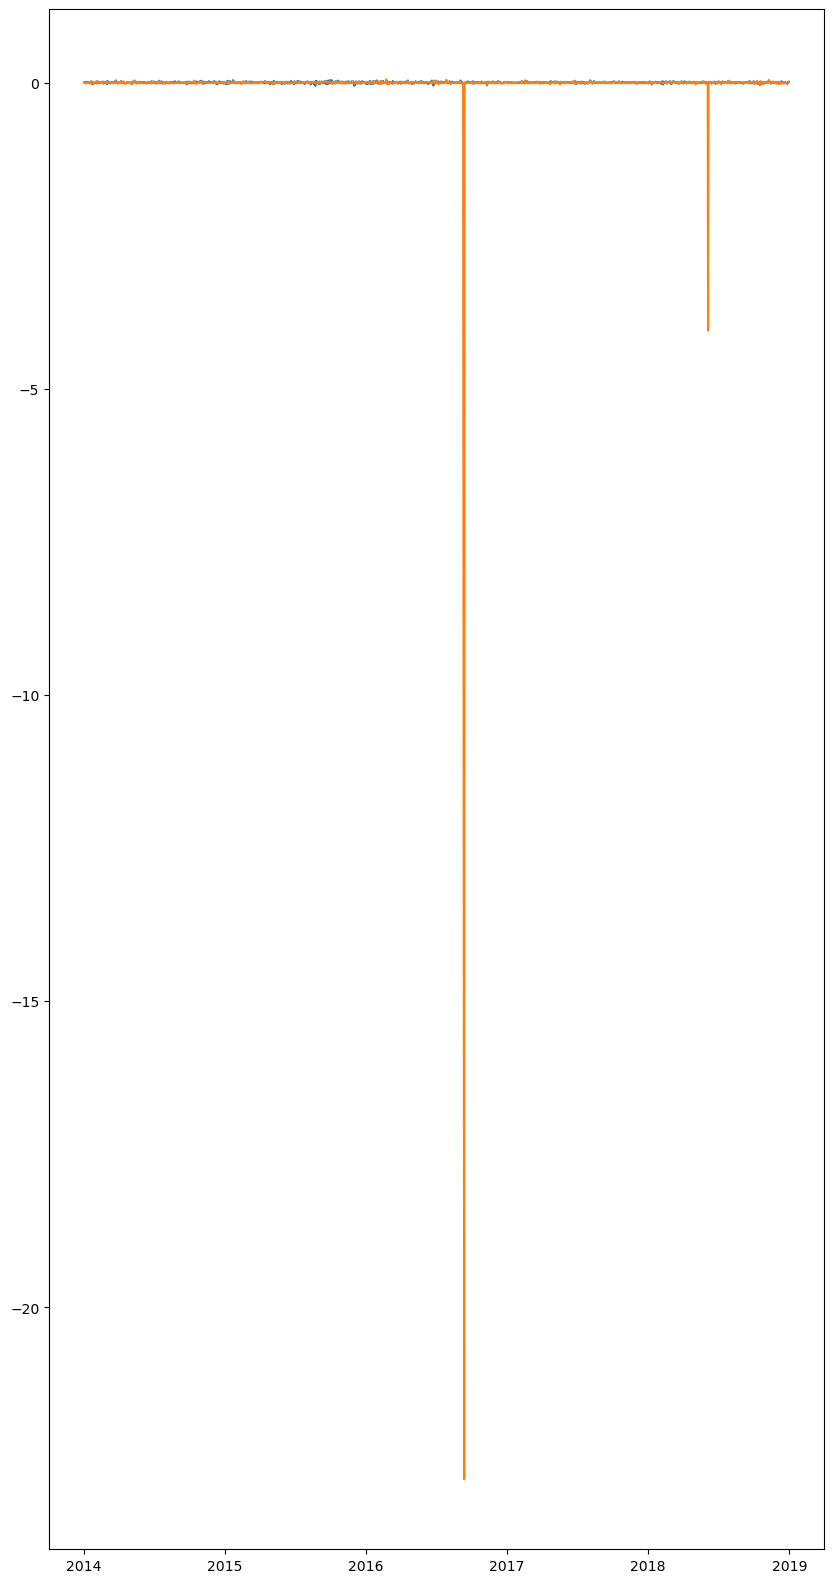

In [138]:
# test
plt.figure(figsize=(10, 20))
plt.plot(returns['BN FP Equity'])
plt.plot(exc_returns['BN FP Equity'])


## Robust location estimation
### Huber location estimator
It is a combination of mean and median, a rubst M-estimator of the location.
$$ \hat{\mu} = min_{\mu} \sum_{i=1}^N \rho (x_i-\mu) $$
Where $\rho$ is the error function to be minimized.

Doing this is necessary to provide the minimum distance between the location estimator and all observations. The minimization is done using algorithms like Simplex or Newton-Raphson.

In [ ]:
# Define a function to calculate Huber location estimator
def huber_loc(series):
    return robust.scale.huber(series)[0]

# Apply the function to all rolling columns of the DataFrame (except days of week)
huber_estimates = X_close.drop(['Day_of_week'], axis=1).rolling(window=4).apply(huber_loc)

In [ ]:
display(huber_estimates)

,VOW3 GY Equity,ENGI FP Equity,BAYN GY Equity,BNP FP Equity,PHIA NA Equity,ISP IM Equity,SAN FP Equity,MC FP Equity,ENEL IM Equity,CS FP Equity,...,GLE FP Equity,ITX SQ Equity,OR FP Equity,BBVA SQ Equity,ASML NA Equity,SAP GY Equity,INGA NA Equity,ENI IM Equity,ABI BB Equity,DTE GY Equity
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,172.027664,16.68875,99.049162,56.090000,25.362324,1.8270,75.614389,116.810246,3.1810,19.87625,...,41.98625,23.7625,125.912500,8.904250,66.770000,61.722499,10.12025,17.5100,75.939999,12.21000
2014-01-08,171.952377,16.72250,99.061462,56.752500,25.503056,1.8635,75.641741,115.582325,3.2080,20.04500,...,42.77625,23.7650,125.450001,9.062500,66.254999,61.942499,10.23900,17.5225,76.279999,12.23375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,124.836483,12.61000,61.857500,40.083751,29.354433,1.9653,75.798384,251.987499,5.1175,18.85150,...,28.43125,23.2975,201.975002,4.670625,137.969997,87.789999,9.65300,13.8410,60.389999,15.16250
2018-12-24,124.195480,12.51250,61.352500,39.642501,29.058895,1.9471,75.308559,250.274998,5.1610,18.80100,...,28.13250,22.8825,200.762501,4.639500,134.904999,87.457499,9.50700,13.8310,59.764999,15.13000
2018-12-27,122.164917,12.31875,60.735000,39.058750,28.691818,1.9196,74.550205,248.962498,5.1420,18.69800,...,27.71125,22.4625,198.887501,4.593875,132.814999,86.599998,9.33925,13.7235,58.764999,14.93375
2018-12-28,121.093710,12.27125,60.625000,39.052500,28.654289,1.9183,74.318968,249.624996,5.1160,18.72100,...,27.67750,22.3950,198.012501,4.590625,133.274998,86.389999,9.33950,13.7040,58.222500,14.85750


In [ ]:
### ???plot original series (for 1 stock) with location ts using different windows (pick the one with less variability)

### Tukey biweight location estimator

Tukey biweight estimator:

$$ \hat{\mu} = \frac{\sum_{i=1}^N w_i x_i}{\sum_{i=1}^N w_i} $$

where:

- $ \hat{\mu}$ is the robust location estimator
- $x_i$ the i-th observation
- $ w_i = \begin{cases}
(1-((\frac{x_i-m}{c})^2)^2)\ \ \ \text{if} \ |x_i-m| \le c\\
0 \ \ \ \text{otherwise}
\end{cases}$

    - in which $m$ = median of the data and $c$ is the Tukey constant (that controls the degree of robustness)


In [ ]:
def tukey_loc(series, c=9):     # try c = 6 and c = 9
    return biweight_location(series, c=c)

tukey_estimates = X_close.drop(['Day_of_week'], axis=1).rolling(window=4).apply(tukey_loc)

In [ ]:
display(tukey_estimates.head(10))

,VOW3 GY Equity,ENGI FP Equity,BAYN GY Equity,BNP FP Equity,PHIA NA Equity,ISP IM Equity,SAN FP Equity,MC FP Equity,ENEL IM Equity,CS FP Equity,...,GLE FP Equity,ITX SQ Equity,OR FP Equity,BBVA SQ Equity,ASML NA Equity,SAP GY Equity,INGA NA Equity,ENI IM Equity,ABI BB Equity,DTE GY Equity
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,172.238263,16.736604,99.034488,55.665822,25.358872,1.824092,75.880213,116.825089,3.181227,19.752234,...,41.521580,23.759661,125.902304,8.765737,66.782484,61.710266,10.092679,17.514403,75.953076,12.211867
2014-01-08,172.102293,16.735788,99.043180,56.728987,25.510426,1.862744,75.880213,115.552453,3.207795,20.042696,...,42.740375,23.762729,125.562759,9.063023,65.853610,61.917861,10.234399,17.523683,76.493208,12.234477
2014-01-09,171.755953,16.722708,98.588145,57.198964,25.585520,1.900265,75.231722,113.882065,3.220337,20.185333,...,43.719811,23.711442,124.388569,9.333097,65.906527,61.930706,10.380813,17.470530,76.716361,12.231980
2014-01-10,172.185378,16.769792,98.221853,57.319659,25.674060,1.918352,74.582276,113.239902,3.237705,20.247647,...,44.187756,23.719991,123.762166,9.318280,65.966368,61.683257,10.529275,17.402176,76.847911,12.236348
2014-01-13,172.998700,16.776571,97.478463,57.677449,25.813951,1.929452,73.837967,113.528583,3.258484,20.214114,...,44.579248,23.675938,123.069340,9.364452,66.322727,61.588169,10.544072,17.344093,76.748386,12.224210
2014-01-14,172.522715,16.778976,97.002343,57.565468,25.990143,1.935354,73.612618,113.673548,3.280087,20.162961,...,44.554625,23.684430,122.709066,9.409258,66.410000,61.085304,10.574334,17.302118,76.320757,12.227020
2014-01-15,174.188337,16.849238,97.270195,57.884550,25.994359,1.946988,73.666690,113.685685,3.308444,20.208304,...,44.887244,23.711823,122.792793,9.544505,66.298126,60.975163,10.691894,17.307959,75.889607,12.358157


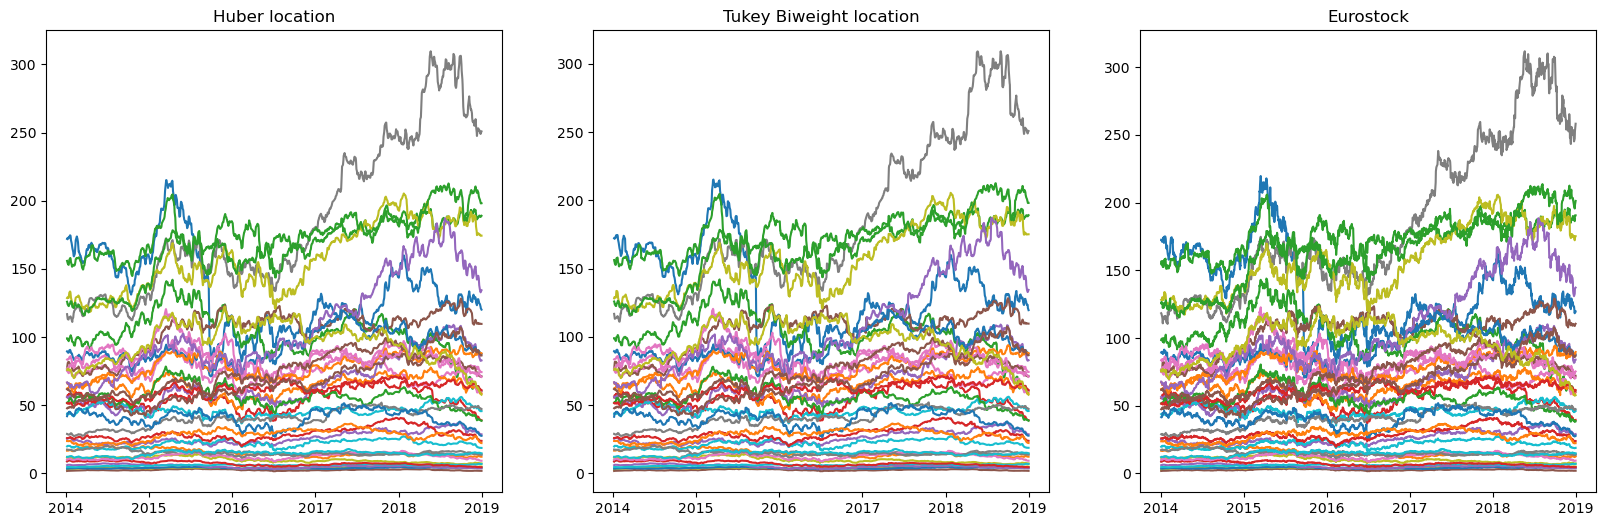

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(huber_estimates)
plt.title("Huber location")
plt.subplot(1,3,2)
plt.plot(tukey_estimates)
plt.title("Tukey Biweight location")
plt.subplot(1,3,3)
plt.plot(X_close.iloc[:,1:])
plt.title("Eurostock")
plt.show()

As we can see from these exploratory plots, the location estimators are both really robust (we are not interested in the name of these stocks). Both are "softening" a bit the time series.

The choice between Tukey and Huber is arbitrary but Tukey seems a bit more robust than Huber in this case, probably due to the mathematical formulation of Tukey, giving less weight to extreme values. For theoretical purposes we proceed the analysis with the Tukey Biweight robust location estimator with a c=9 (which is good since financial data are extremely volatile and a high value of c can help mitigate even more these fluctuations).

In [ ]:
# Save data
tukey_estimates.to_pickle("data/tukey_estimates.pkl")
huber_estimates.to_pickle("data/huber_estimates.pkl")